In [2]:
"""Fill missing values"""
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

In [7]:
def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    ##########################################################
    df_data.fillna(method='ffill',inplace=True)
    df_data.fillna(method='bfill', inplace=True)
    return df_data
    ##########################################################
    

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df_final = pd.DataFrame(index=dates)
    if "SPY" not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, "SPY")

    for symbol in symbols:
        file_path = symbol_to_path(symbol)
        df_temp = pd.read_csv(file_path, parse_dates=True, index_col="Date",
            usecols=["Date", "Adj Close"], na_values=["nan"])
        df_temp = df_temp.rename(columns={"Adj Close": symbol})
        df_final = df_final.join(df_temp)
        if symbol == "SPY":  # drop dates SPY did not trade
            df_final = df_final.dropna(subset=["SPY"])

    return df_final


def plot_data(df_data):
    """Plot stock data with appropriate axis labels."""
    ax = df_data.plot(title="Stock Data", fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

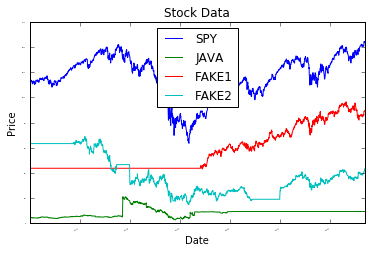

In [9]:
# Read data
symbol_list = ["JAVA", "FAKE1", "FAKE2"]  # list of symbols
start_date = "2005-12-31"
end_date = "2014-12-07"
dates = pd.date_range(start_date, end_date)  # date range as index
df_data = get_data(symbol_list, dates)  # get data for each symbol

# Fill missing values
fill_missing_values(df_data)

# Plot
plot_data(df_data)